
# Yeni Bölüm
df_copy.info()


In [27]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
from ctypes import LibraryLoader
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble
import sklearn.linear_model
import sklearn.tree




In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [120]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', '(;.2f)' .format)

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
df = pd.read_csv("/content/drive/MyDrive/Sunum/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),NaN,NaN,Yarra City Council,(;.2f),(;.2f),Northern Metropolitan,(;.2f)
1,Abbotsford,85 Turner St,2,h,(;.2f),S,Biggin,3/12/2016,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),NaN,NaN,Yarra City Council,(;.2f),(;.2f),Northern Metropolitan,(;.2f)
2,Abbotsford,25 Bloomburg St,2,h,(;.2f),S,Biggin,4/02/2016,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),Yarra City Council,(;.2f),(;.2f),Northern Metropolitan,(;.2f)
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),NaN,NaN,Yarra City Council,(;.2f),(;.2f),Northern Metropolitan,(;.2f)
4,Abbotsford,5 Charles St,3,h,(;.2f),SP,Biggin,4/03/2017,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),Yarra City Council,(;.2f),(;.2f),Northern Metropolitan,(;.2f)


In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [96]:
print(f'Shape          : {df_copy.shape}\n'
       f'Size          : {df_copy.size}\n'
       f'Dimension     : {df_copy.ndim}')

Shape          : (34857, 21)
Size          : 731997
Dimension     : 2


In [97]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [121]:
df_copy.duplicated().sum()

1

In [99]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),Manningham City Council,(;.2f),(;.2f),Eastern Metropolitan,(;.2f)
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),Manningham City Council,(;.2f),(;.2f),Eastern Metropolitan,(;.2f)


In [122]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Price,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Distance,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Postcode,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Bedroom2,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Bathroom,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Car,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
Landsize,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
BuildingArea,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)
YearBuilt,(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f),(;.2f)


In [123]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [124]:
cat_cols = ['Type ', 'Method', 'Regionname']
bun_cols = ['Suburb', 'Address', 'Rooms', 'Price', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount']

ValueError: ignored

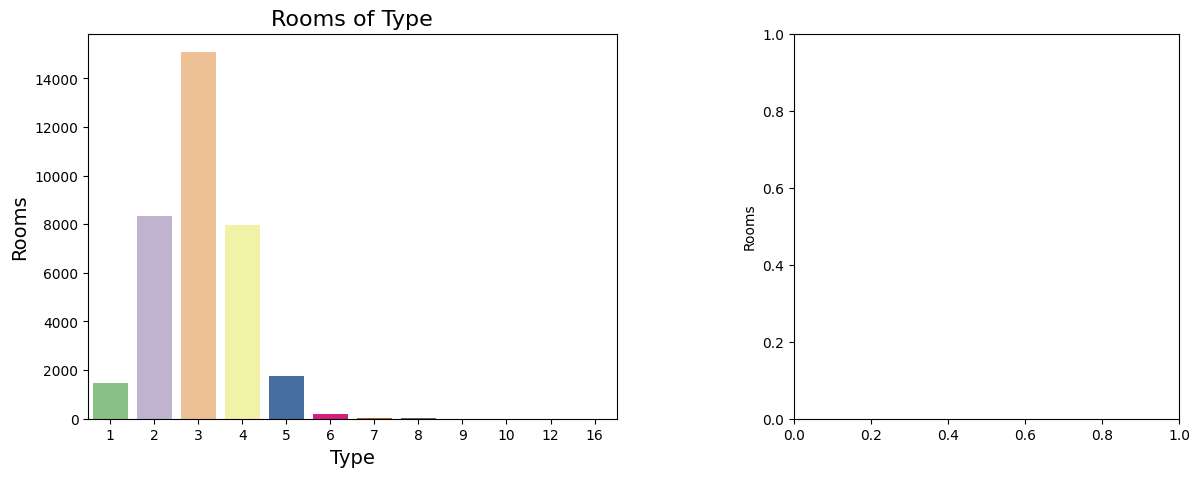

In [128]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['Rooms'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Rooms', fontsize=14)
axs[0].set_title("Rooms of Type", fontsize=16)

ax2 = df_copy['Rooms'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');
axs[1].set_title("Type of Rooms ", fontsize=16);

ValueError: ignored

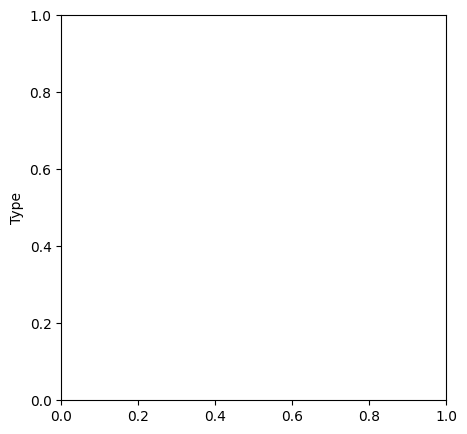

In [131]:
ax = df_copy['output'].value_counts().plot.pie(explode=[0,0.07],
                                               colors=["#81b7d2", "#ffcce7"],
                                               autopct='%.2f%%',
                                               figsize=(15, 5))
ax.set_title('Target Distribution');

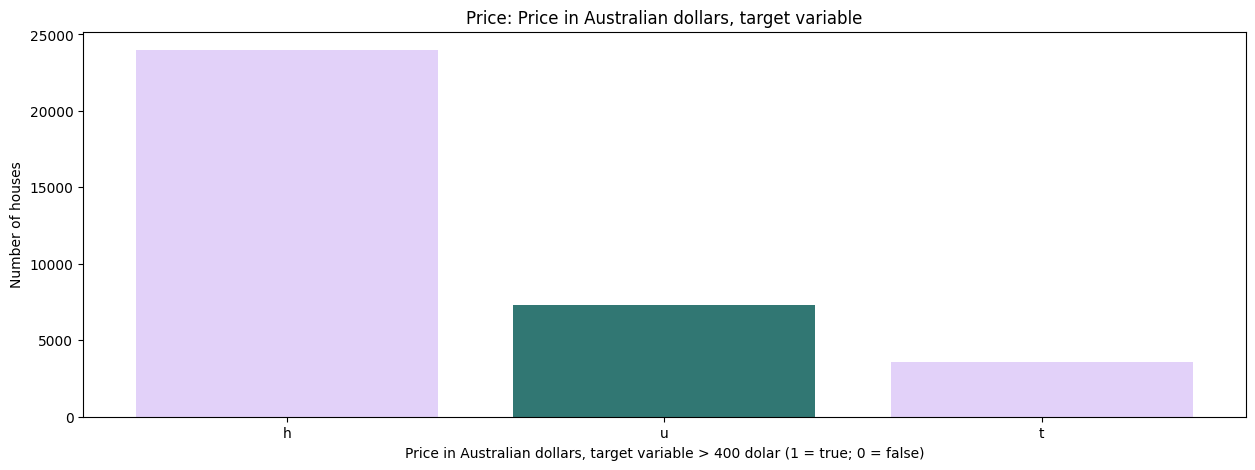

In [135]:
fbs_count = df['Type'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(fbs_count.index, fbs_count.values, color=["#E2D1F9", "#317773"])
plt.title('Price: Price in Australian dollars, target variable')
plt.xlabel('Price in Australian dollars, target variable > 400 dolar (1 = true; 0 = false)')
plt.ylabel('Number of houses')
plt.show()

<ipython-input-136-1bd880687dcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


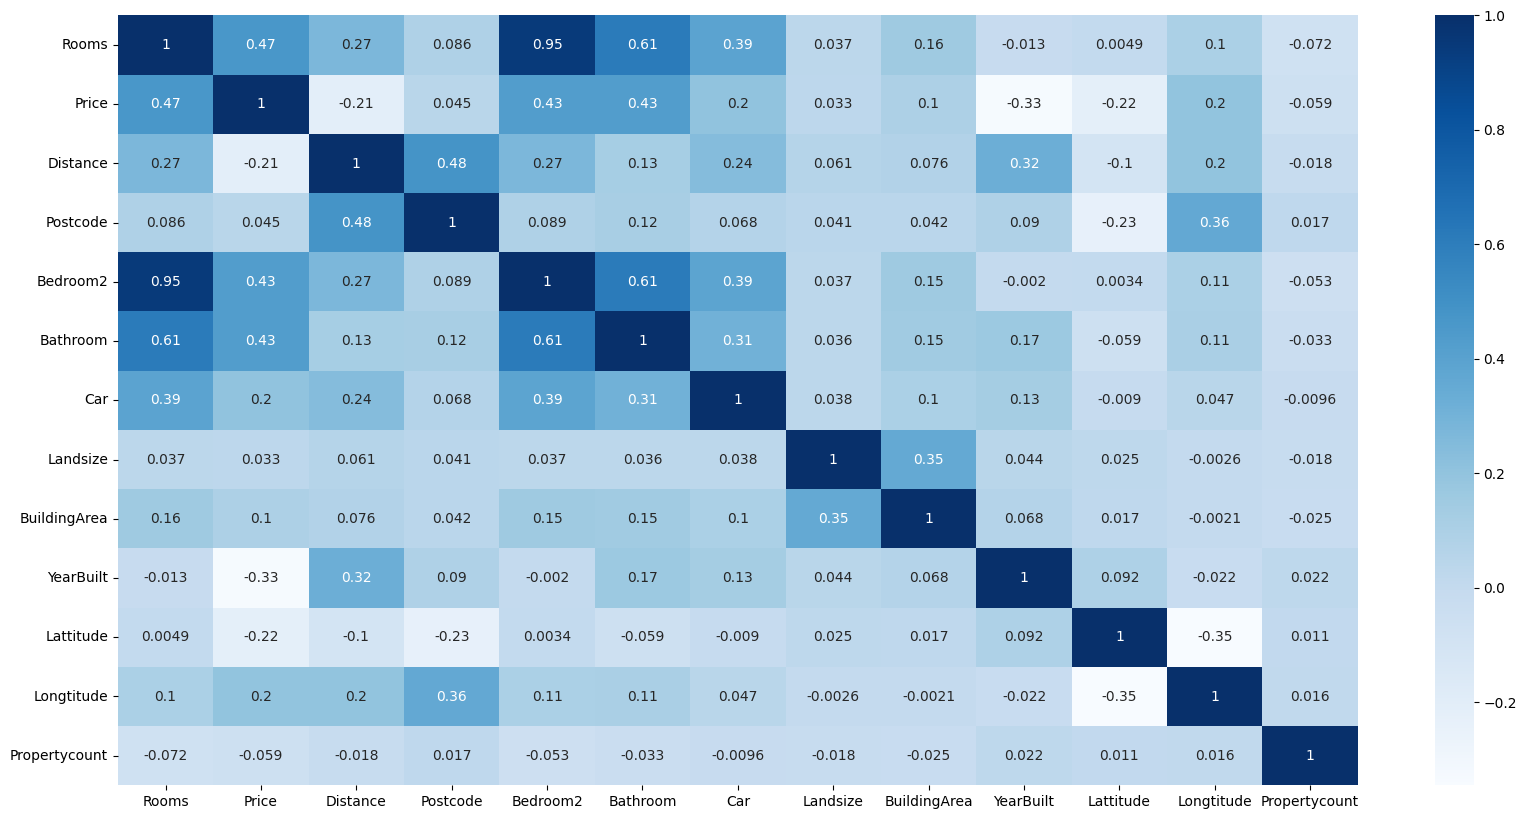

In [136]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);